# Phytoplankton biomass for warm and cold years within the $2^{nd}$ cycle of the model run for every month, make sure to use these to greate gif videos. 

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import hvplot.xarray
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 
from copy import deepcopy
import pandas as pd
import matplotlib
import matplotlib.colors as colors
from cartopy.util import add_cyclic_point
import matplotlib.gridspec as gridspec
plt.rcParams['mathtext.default']='regular'
from collections import OrderedDict
import cmocean
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns

# Scientific libraries
from numpy import arange,array,ones
from scipy import stats
import os
import matplotlib.gridspec as gridspec

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

## input file

In [4]:
ppC_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_ppC.*.nc', recursive=True))
ppC_ds = xr.open_mfdataset(ppC_inds,concat_dim='time', combine='nested')
mp1C_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_mp1C.*.nc', recursive=True))
mp1C_ds = xr.open_mfdataset(mp1C_inds,concat_dim='time', combine='nested')
mp2C_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_mp2C.*.nc', recursive=True))
mp2C_ds = xr.open_mfdataset(mp2C_inds,concat_dim='time', combine='nested')
mp3C_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_mp3C.*.nc', recursive=True))
mp3C_ds = xr.open_mfdataset(mp3C_inds,concat_dim='time', combine='nested')
mp4C_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_mp4C.*.nc', recursive=True))
mp4C_ds = xr.open_mfdataset(mp4C_inds,concat_dim='time', combine='nested')
diazC_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_diazC.*.nc', recursive=True))
diazC_ds = xr.open_mfdataset(diazC_inds,concat_dim='time', combine='nested')
diat1C_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_diat1C.*.nc', recursive=True))
diat1C_ds = xr.open_mfdataset(diat1C_inds,concat_dim='time', combine='nested')
diat2C_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_diat2C.*.nc', recursive=True))
diat2C_ds = xr.open_mfdataset(diat2C_inds,concat_dim='time', combine='nested')
diat3C_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_diat3C.*.nc', recursive=True))
diat3C_ds = xr.open_mfdataset(diat3C_inds,concat_dim='time', combine='nested')

zoo1_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_zoo1C.*.nc', recursive=True))
zoo1_ds = xr.open_mfdataset(zoo1_inds,concat_dim='time', combine='nested')
zoo2_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_zoo2C.*.nc', recursive=True))
zoo2_ds = xr.open_mfdataset(zoo2_inds,concat_dim='time', combine='nested')
zoo3_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_zoo3C.*.nc', recursive=True))
zoo3_ds = xr.open_mfdataset(zoo3_inds,concat_dim='time', combine='nested')
zoo4_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_zoo4C.*.nc', recursive=True))
zoo4_ds = xr.open_mfdataset(zoo4_inds,concat_dim='time', combine='nested')
zoo5_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_zoo5C.*.nc', recursive=True))
zoo5_ds = xr.open_mfdataset(zoo5_inds,concat_dim='time', combine='nested')
zoo6_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_zoo6C.*.nc', recursive=True))
zoo6_ds = xr.open_mfdataset(zoo6_inds,concat_dim='time', combine='nested')

In [5]:
planktonC = np.stack([ppC_ds.ppC, mp1C_ds.mp1C, 
                      diat1C_ds.diat1C, mp2C_ds.mp2C, diat2C_ds.diat2C, 
                      mp3C_ds.mp3C, diat3C_ds.diat3C, mp4C_ds.mp4C,
                      zoo1_ds.zoo1C, zoo2_ds.zoo2C, zoo3_ds.zoo3C, 
                      zoo4_ds.zoo4C, zoo5_ds.zoo5C, zoo6_ds.zoo6C])

In [6]:
planktonC_ds_inter = np.empty([14,63,12,15,180,360])
planktonC_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    planktonC_ds_inter[:,i,:,:,:,:] = planktonC[:,x[i]:x[i]+12,:,:,:]

## Selecting warm adn cold years 

In [7]:
temp_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_TEMP*.nc', recursive=True))
ds= xr.open_mfdataset(temp_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

In [8]:
temp_ds_inter = np.empty([63,12,180,360])
temp_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    temp_ds_inter[i,:,:,:] = ds.TEMP[x[i]:x[i]+12,0,:,:]

In [9]:
temp_arctic = np.nanmean(temp_ds_inter[:,:,149:180,:], axis=(2,3))
temp_arctic_anom = temp_arctic-np.nanmean(temp_arctic,axis=0)
err_ao = np.nanstd(temp_arctic_anom,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
cold_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) < -(err_ao/2))
warm_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) > (err_ao/2))

## Biomass for each size class

In [10]:
planktonC_bm = np.sum(planktonC_ds_inter, axis=3) * 10 #integrate over depth #mmol m-2

In [11]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (20, 15),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'font.family':'serif',
         'font.size': 12}
pylab.rcParams.update(params)

In [12]:
import seaborn as sns
import scipy.io as sio

In [13]:
cold_years = planktonC_bm[:,cold_years_arctic,:,149:180,:] # 1/2 standard deviation 
warm_years = planktonC_bm[:,warm_years_arctic,:,149:180,:] # 1/2 standard deviation 

In [14]:
cold_years.shape

(14, 1, 19, 12, 31, 360)

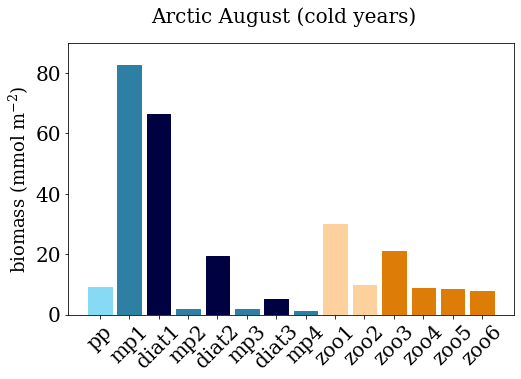

In [27]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']


ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,7,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,90])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

fig.suptitle('Arctic August (cold years)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_08_low_temp_bar_50std.png')

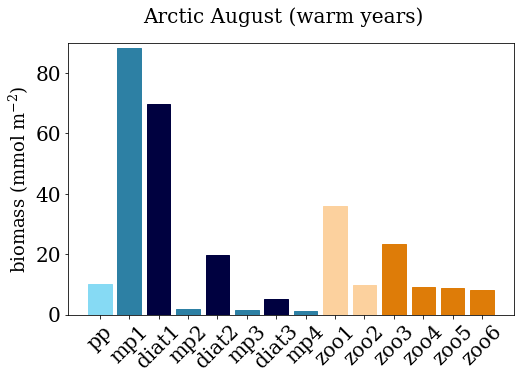

In [28]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(warm_years[:,:,:,7,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,90])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic August (warm years)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_08_high_temp_bar_50std.png')

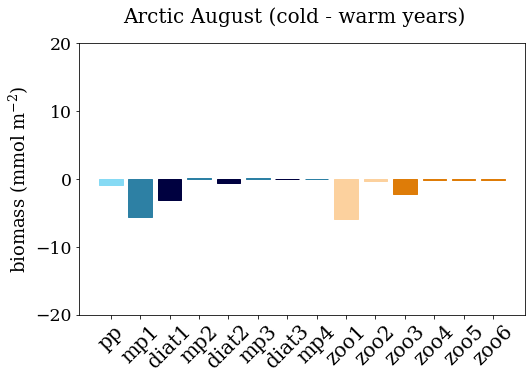

In [29]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,7,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,7,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-20,20])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
#ax.set_yticklabels(fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic August (cold - warm years)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_08_low_vs_high_temp_bar_50std.png')

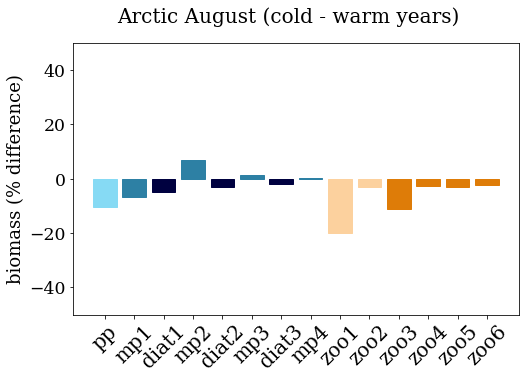

In [30]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,((np.nanmean(cold_years[:,:,:,7,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,7,:,:], axis=(1,2,3,4)))/np.nanmean(cold_years[:,:,:,7,:,:], axis=(1,2,3,4)))*100)
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-50,50])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)

fig.suptitle('Arctic August (cold - warm years)', fontsize=20)
ax.set_ylabel('biomass (% difference)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_08_low_vs_high_temp_bar_50std_diff.png')

In [20]:
## Sea Ice Fraction 

In [31]:
temp_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_ECOSYS_IFRAC*.nc', recursive=True))
ds= xr.open_mfdataset(temp_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

In [32]:
ECOSYS_IFRAC_ds_inter = np.empty([63,12,180,360])
ECOSYS_IFRAC_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    ECOSYS_IFRAC_ds_inter[i,:,:,:] = ds.ECOSYS_IFRAC[x[i]:x[i]+12,:,:]

In [33]:
temp_arctic = np.nanmean(ECOSYS_IFRAC_ds_inter[:,:,149:180,:], axis=(2,3))
temp_arctic_anom = temp_arctic-np.nanmean(temp_arctic,axis=0)
err_ao = np.nanstd(temp_arctic_anom,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
cold_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) < -(err_ao/2))
warm_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) > (err_ao/2))

In [34]:
cold_years = planktonC_bm[:,cold_years_arctic,:,149:180,:] # 1/2 standard deviation 
warm_years = planktonC_bm[:,warm_years_arctic,:,149:180,:] # 1/2 standard deviation 

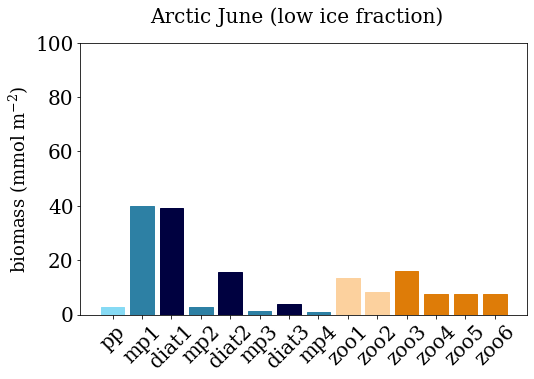

In [110]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,100])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

fig.suptitle('Arctic June (low ice fraction)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_06_low_IceFrac_bar_50std.png')

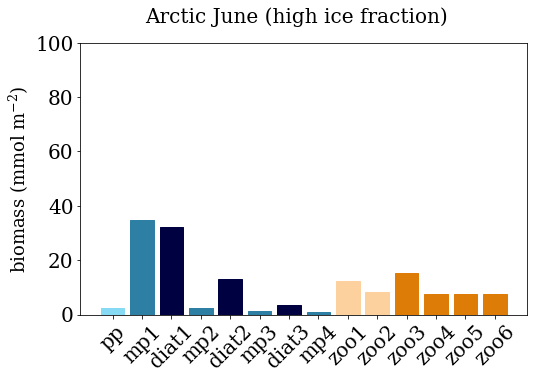

In [109]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(warm_years[:,:,:,5,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,100])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic June (high ice fraction)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_06_high_IceFrac_bar_50std.png')

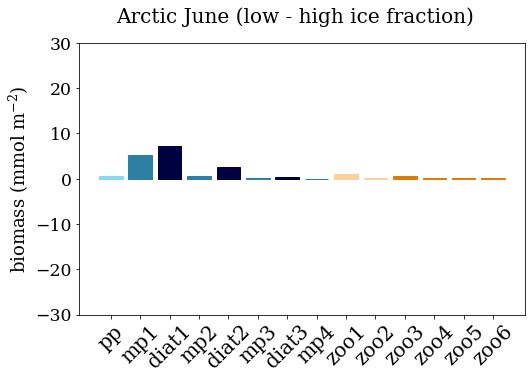

In [108]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,5,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-30,30])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
#ax.set_yticklabels(fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic June (low - high ice fraction)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_06_low_vs_high_IceFrac_bar_50std.png')

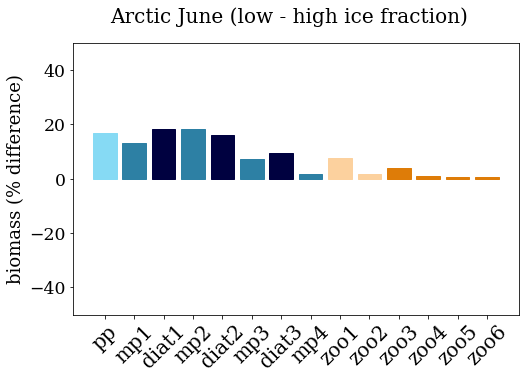

In [107]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,((np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,5,:,:], axis=(1,2,3,4)))/np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4)))*100)
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-50,50])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)

fig.suptitle('Arctic June (low - high ice fraction)', fontsize=20)
ax.set_ylabel('biomass (% difference)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_06_AO_low_vs_high_iceFrac_bar_50std_diff.png')

In [28]:
## Light availability

In [111]:
PAR_avg_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_PAR_avg*.nc', recursive=True))
ds= xr.open_mfdataset(PAR_avg_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

In [112]:
PAR_avg_ds_inter = np.empty([63,12,180,360])
PAR_avg_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    PAR_avg_ds_inter[i,:,:,:] = ds.PAR_avg[x[i]:x[i]+12,0,:,:]

In [113]:
temp_arctic = np.nanmean(PAR_avg_ds_inter[:,:,149:180,:], axis=(2,3))
temp_arctic_anom = temp_arctic-np.nanmean(temp_arctic,axis=0)
err_ao = np.nanstd(temp_arctic_anom,axis=(0,1))

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
cold_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) < -(err_ao/2))
warm_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) > (err_ao/2))

In [114]:
cold_years = planktonC_bm[:,cold_years_arctic,:,149:180,:] # 1/2 standard deviation 
warm_years = planktonC_bm[:,warm_years_arctic,:,149:180,:] # 1/2 standard deviation 

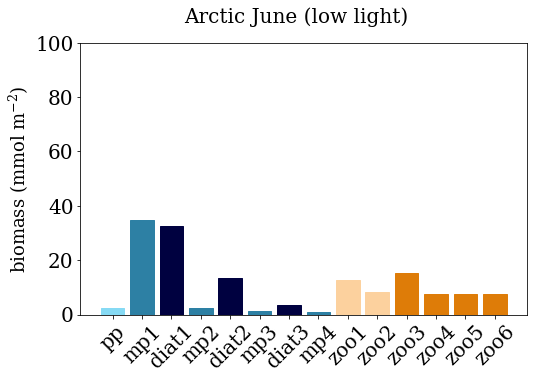

In [165]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,100])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

fig.suptitle('Arctic June (low light)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_06_low_light_bar_50std.png')

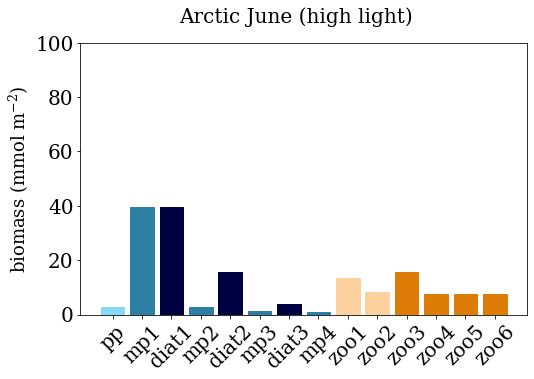

In [166]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(warm_years[:,:,:,5,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,100])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80,100], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic June (high light)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_06_high_light_bar_50std.png')

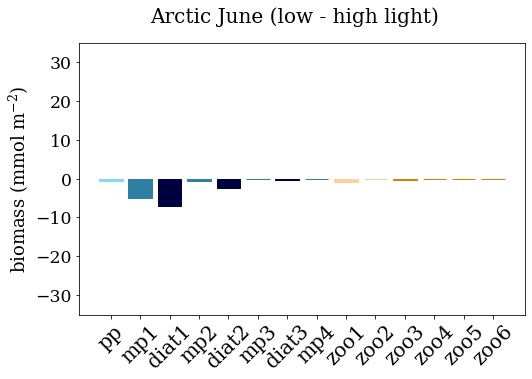

In [167]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,5,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-35,35])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
#ax.set_yticklabels(fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic June (low - high light)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_06_low_vs_high_light_bar_50std.png')

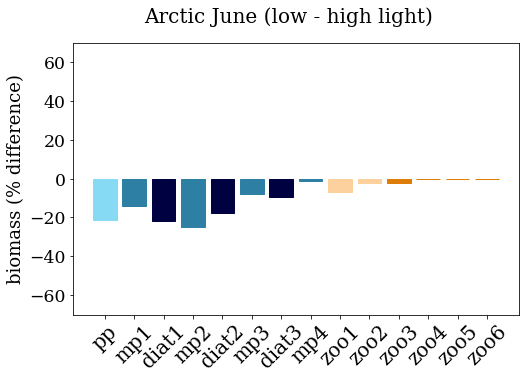

In [168]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,((np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,5,:,:], axis=(1,2,3,4)))/np.nanmean(cold_years[:,:,:,5,:,:], axis=(1,2,3,4)))*100)
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-70,70])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)

fig.suptitle('Arctic June (low - high light)', fontsize=20)
ax.set_ylabel('biomass (% difference)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_06_AO_low_vs_high_light_bar_50std_diff.png')

In [36]:
# Nutrients 

In [169]:
NO3_inds = sorted(glob.glob('/glade/scratch/gabyn/SPECTRA/GNG595_monthly_yearly_1948_2009/regrid_SPECTRA_NO3*.nc', recursive=True))
ds= xr.open_mfdataset(NO3_inds,concat_dim='time', combine='nested') # Full 62 years of second cycle

In [170]:
NO3_ds_inter = np.empty([63,12,180,360])
NO3_ds_inter[:] = np.nan
x = np.array(range(0,756,12)) ## this loops from 0 to 2016, and selects every 12th number. 
for i in range(63):
    NO3_ds_inter[i,:,:,:] = ds.NO3[x[i]:x[i]+12,0,:,:]

In [171]:
temp_arctic = np.nanmean(NO3_ds_inter[:,:,149:180,:], axis=(2,3))
temp_arctic_anom = temp_arctic-np.nanmean(temp_arctic,axis=0)
err_ao = np.nanstd(temp_arctic_anom,axis=(0,1))

# Selecting the warm and cold years as less or more than zero 
#cold_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) < 0)
#warm_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) > 0)

# Selecting the warm and cold years as less or more than 1/3 of standard deviation 
cold_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) < -(err_ao/2))
warm_years_arctic = np.where(np.nanmean(temp_arctic_anom,axis=1) > (err_ao/2))

In [172]:
cold_years = planktonC_bm[:,cold_years_arctic,:,149:180,:] # 1/2 standard deviation 
warm_years = planktonC_bm[:,warm_years_arctic,:,149:180,:] # 1/2 standard deviation 

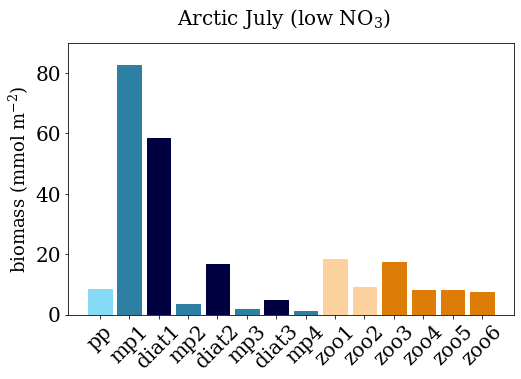

In [225]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,6,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,90])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

fig.suptitle('Arctic July (low NO$_3$)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_07_low_NO3_bar_50std.png')

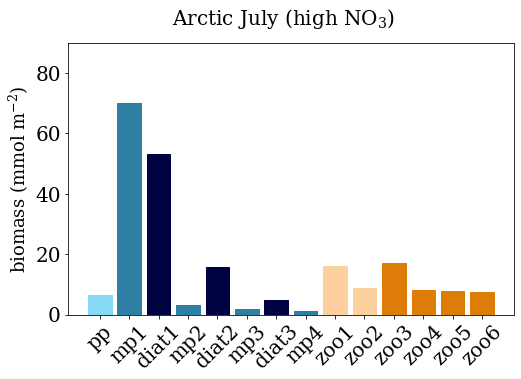

In [224]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(warm_years[:,:,:,6,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([0,90])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
ax.set_yticklabels([0,20,40,60,80], fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic July (high NO$_3$)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_07_high_NO3_bar_50std.png')

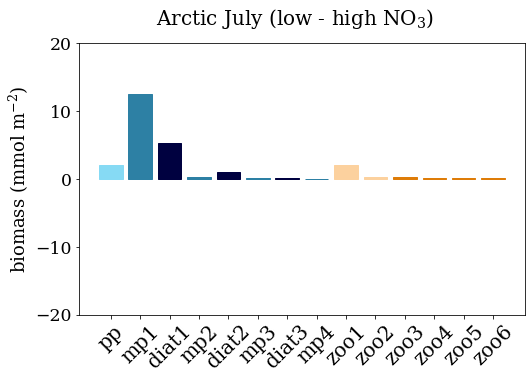

In [223]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,np.nanmean(cold_years[:,:,:,6,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,6,:,:], axis=(1,2,3,4)))
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-20,20])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)
#ax.set_yticklabels(fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=24 )
#ax.set_title('summer', fontsize=18)

    
fig.suptitle('Arctic July (low - high NO$_3$)', fontsize=20)
ax.set_ylabel('biomass (mmol m$^{-2}$)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_AO_07_low_vs_high_NO3_bar_50std.png')

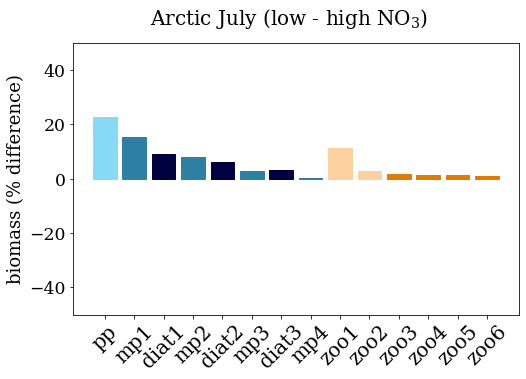

In [222]:
fig = plt.figure(figsize=(8, 5)) 
barWidth=1
x = months = ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec')
xx = phyto_vars = ['pp','mp1','diat1','mp2','diat2','mp3','diat3','mp4','zoo1','zoo2','zoo3','zoo4','zoo5','zoo6']

ax = fig.add_subplot(1, 1, 1)
barlist = ax.bar(xx,((np.nanmean(cold_years[:,:,:,6,:,:], axis=(1,2,3,4))-np.nanmean(warm_years[:,:,:,6,:,:], axis=(1,2,3,4)))/np.nanmean(cold_years[:,:,:,6,:,:], axis=(1,2,3,4)))*100)
barlist[0].set_color('#86daf4') # picoplankton
barlist[1].set_color('#2d80a4') # mixed phytoplankton 
#barlist[2].set_color('#60baf7') # diazotrophs 
barlist[2].set_color('#000140') # diatom 
barlist[3].set_color('#2d80a4') # mixed phytoplankton 
barlist[4].set_color('#000140') # diatom 
barlist[5].set_color('#2d80a4') # mixed phytoplankton 
barlist[6].set_color('#000140') # diatom 
barlist[7].set_color('#2d80a4') # mixed phytoplankton 
barlist[8].set_color('#FCD19E') # microzooplankton
barlist[9].set_color('#FCD19E') # microzooplankton
barlist[10].set_color('#DE7C08') # mesozooplankton
barlist[11].set_color('#DE7C08') # mesozooplankton
barlist[12].set_color('#DE7C08') # mesozooplankton
barlist[13].set_color('#DE7C08') # mesozooplankton
ax.set_ylim([-50,50])
ax.set_xticklabels(phyto_vars, rotation = 45, fontsize=20)

fig.suptitle('Arctic July (low - high NO$_3$)', fontsize=20)
ax.set_ylabel('biomass (% difference)',fontsize=18 )
figures_file = '/glade/u/home/gabyn/case_notes/analysis_figures'
fig.savefig(''+figures_file+'/GNG595/Phyto_biomass_07_AO_low_vs_high_no3_bar_50std_diff.png')